# Objectives

Perform exploratory  Data Analysis and determine Training Labels

*   Create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for **Logistic Regression**, **Decision Trees**, **K-Nearest-neighbours (KNN)**, **Support Vector Machine (SVM)**, **Random Forest**, and 

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions

#### We will import the following libraries for this project

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
#from sklearn.model_selection import GridSearchCV  ## We did not use
# Allows us to test accuracy by jaccard_score
from sklearn.metrics import jaccard_score
# Allows us to see the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
# Allows us to see the classification_report or F1 Score
from sklearn.metrics import classification_report
# Allows us to see the log loss score
from sklearn.metrics import log_loss
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
from sklearn import svm
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
# Import Library for Random Forest
from sklearn.ensemble import RandomForestClassifier

## Load the dataframe

#### Load the data

In [2]:
data=pd.read_csv("/Users/ashraful/Dropbox/deep_learning_project/creditcard_fraud_detection/creditcard.csv")

## Explore the dataset

#### Shape of the data, head and tail

In [3]:
print('1. DATA SHAPE: ', data.shape)
print('2. DATA HEAD: '"\n",  data.head(5))
print('3. DATA TAIL: '"\n",  data.tail(5))

1. DATA SHAPE:  (284807, 31)
2. DATA HEAD: 
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -

#### Check the types of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Checking missing values

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Describe the summary statistics

In [6]:
pd.set_option('precision',2)
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,...,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,284807.00,2.85e+05
mean,94813.86,3.92e-15,5.68e-16,-8.76e-15,2.81e-15,-1.55e-15,2.04e-15,-1.70e-15,-1.89e-16,-3.15e-15,...,1.47e-16,8.04e-16,5.28e-16,4.46e-15,1.43e-15,1.70e-15,-3.66e-16,-1.22e-16,88.35,1.73e-03
std,47488.15,1.96e+00,1.65e+00,1.52e+00,1.42e+00,1.38e+00,1.33e+00,1.24e+00,1.19e+00,1.10e+00,...,7.35e-01,7.26e-01,6.24e-01,6.06e-01,5.21e-01,4.82e-01,4.04e-01,3.30e-01,250.12,4.15e-02
min,0.00,-5.64e+01,-7.27e+01,-4.83e+01,-5.68e+00,-1.14e+02,-2.62e+01,-4.36e+01,-7.32e+01,-1.34e+01,...,-3.48e+01,-1.09e+01,-4.48e+01,-2.84e+00,-1.03e+01,-2.60e+00,-2.26e+01,-1.54e+01,0.00,0.00e+00
25%,54201.50,-9.20e-01,-5.99e-01,-8.90e-01,-8.49e-01,-6.92e-01,-7.68e-01,-5.54e-01,-2.09e-01,-6.43e-01,...,-2.28e-01,-5.42e-01,-1.62e-01,-3.55e-01,-3.17e-01,-3.27e-01,-7.08e-02,-5.30e-02,5.60,0.00e+00
50%,84692.00,1.81e-02,6.55e-02,1.80e-01,-1.98e-02,-5.43e-02,-2.74e-01,4.01e-02,2.24e-02,-5.14e-02,...,-2.95e-02,6.78e-03,-1.12e-02,4.10e-02,1.66e-02,-5.21e-02,1.34e-03,1.12e-02,22.00,0.00e+00
75%,139320.50,1.32e+00,8.04e-01,1.03e+00,7.43e-01,6.12e-01,3.99e-01,5.70e-01,3.27e-01,5.97e-01,...,1.86e-01,5.29e-01,1.48e-01,4.40e-01,3.51e-01,2.41e-01,9.10e-02,7.83e-02,77.16,0.00e+00
max,172792.00,2.45e+00,2.21e+01,9.38e+00,1.69e+01,3.48e+01,7.33e+01,1.21e+02,2.00e+01,1.56e+01,...,2.72e+01,1.05e+01,2.25e+01,4.58e+00,7.52e+00,3.52e+00,3.16e+01,3.38e+01,25691.16,1.00e+00


#### Checking transaction distribution

In [7]:
Total_transactions = len(data)
secured = len(data[data.Class == 0])
fraud = len(data[data.Class == 1])
fraud_percentage = round(fraud/secured*100, 2)
print('Total number of Transaction are:', Total_transactions)
print('Total number of Secured Transaction are:', secured)
print('Total number of Fraud Transaction are:', fraud)
print('Percentage of Fraud Transaction are:', fraud_percentage)

Total number of Transaction are: 284807
Total number of Secured Transaction are: 284315
Total number of Fraud Transaction are: 492
Percentage of Fraud Transaction are: 0.17


#### Independent Variables

In [8]:
X = data.loc[:, data.columns != 'Class']
X[0:5]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,0.25,-1.83e-02,2.78e-01,-0.11,0.07,0.13,-0.19,1.34e-01,-0.02,149.62
1,0.0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.07,-2.26e-01,-6.39e-01,0.10,-0.34,0.17,0.13,-8.98e-03,0.01,2.69
2,1.0,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.52,2.48e-01,7.72e-01,0.91,-0.69,-0.33,-0.14,-5.54e-02,-0.06,378.66
3,1.0,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.21,-1.08e-01,5.27e-03,-0.19,-1.18,0.65,-0.22,6.27e-02,0.06,123.50
4,2.0,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,0.41,-9.43e-03,7.98e-01,-0.14,0.14,-0.21,0.50,2.19e-01,0.22,69.99


#### Standardize the data in X 

In [9]:
x_scaled = preprocessing.scale(X)
X = pd.DataFrame(x_scaled)
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.00,-0.69,-0.04,1.67,0.97,-2.45e-01,0.35,0.19,0.08,0.33,...,3.26e-01,-0.02,3.83e-01,-0.18,0.11,0.25,-0.39,3.31e-01,-0.06,0.24
1,-2.00,0.61,0.16,0.11,0.32,4.35e-02,-0.06,-0.06,0.07,-0.23,...,-8.96e-02,-0.31,-8.80e-01,0.16,-0.56,0.32,0.26,-2.23e-02,0.04,-0.34
2,-2.00,-0.69,-0.81,1.17,0.27,-3.65e-01,1.35,0.64,0.21,-1.38,...,6.81e-01,0.34,1.06e+00,1.46,-1.14,-0.63,-0.29,-1.37e-01,-0.18,1.16
3,-2.00,-0.49,-0.11,1.18,-0.61,-7.47e-03,0.94,0.19,0.32,-1.26,...,-2.70e-01,-0.15,7.27e-03,-0.30,-1.94,1.24,-0.46,1.55e-01,0.19,0.14
4,-2.00,-0.59,0.53,1.02,0.28,-2.95e-01,0.07,0.48,-0.23,0.74,...,5.30e-01,-0.01,1.10e+00,-0.22,0.23,-0.40,1.04,5.44e-01,0.65,-0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.64,-6.07,6.10,-6.49,-1.46,-3.89e+00,-1.96,-3.98,6.12,1.74,...,1.91e+00,0.29,1.54e-01,1.62,-0.84,2.76,0.52,2.34e+00,2.50,-0.35
284803,1.64,-0.37,-0.03,1.34,-0.52,6.29e-01,0.79,0.02,0.25,0.53,...,7.73e-02,0.29,1.27e+00,0.02,-1.68,-1.16,-0.82,1.70e-01,-0.16,-0.25
284804,1.64,0.98,-0.18,-2.14,-0.39,1.91e+00,2.28,-0.24,0.59,0.39,...,1.81e-03,0.32,7.97e-01,-0.06,1.06,0.51,-0.18,1.10e-02,-0.08,-0.08
284805,1.64,-0.12,0.32,0.46,0.49,-2.74e-01,0.47,-0.55,0.57,0.36,...,1.65e-01,0.36,1.10e+00,-0.26,0.20,-1.09,1.13,2.70e-01,0.32,-0.31


#### Dependent Variable

In [10]:
y = data["Class"].to_numpy()
y[0:5]

array([0, 0, 0, 0, 0])

#### Now, we normalize the dataset

In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.99658302, -0.69424232, -0.04407492,  1.6727735 ,  0.97336551,
        -0.24511658,  0.34706795,  0.19367894,  0.08263728,  0.33112778,
         0.08338555, -0.54040704, -0.61829572, -0.99609892, -0.32461019,
         1.60401384, -0.53683287,  0.24486345,  0.03076993,  0.49628203,
         0.32611802, -0.02492336,  0.38285444, -0.17691133,  0.11050692,
         0.24658544, -0.39217043,  0.33089162, -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592,  0.1097971 ,  0.31652293,
         0.04348335, -0.06181997, -0.06370021,  0.07125348, -0.23249419,
        -0.15334963,  1.58000285,  1.06608857,  0.4914182 , -0.14998248,
         0.69436042,  0.52943375, -0.13516997, -0.21876258, -0.17908605,
        -0.08961086, -0.3073768 , -0.88007675,  0.16220118, -0.56113055,
         0.3206939 ,  0.26106948, -0.02225568,  0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783,  1.16946849,  0.26823129,
        -0.36457179,  1.35145359,  0.63977564,  0

## Spliting Data into Train and Test Set

In [12]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (227845, 30) (227845,)
Test set: (56962, 30) (56962,)


## Modeling

### Logistic Regression with Scikit-learn

**C** parameter indicates **inverse of regularization strength** which must be a positive float.

In [13]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Now we can predict using our test set:

In [14]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0])

**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [15]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.99687968, 0.00312032],
       [0.99682549, 0.00317451],
       [0.99760094, 0.00239906],
       ...,
       [0.99740355, 0.00259645],
       [0.99480663, 0.00519337],
       [0.98910047, 0.01089953]])

#### Accuracy Evaluation by Jaccard Index

we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [16]:
LR_AS = round(jaccard_score(y_test, yhat,pos_label=0)*100,2)

LR_AS

99.93

#### Accuracy Evaluation by Confusion Matrix

Another way of looking at the accuracy of the classifier is to look at **confusion matrix**.

Confusion matrix:
 [[   53    31]
 [    8 56870]]


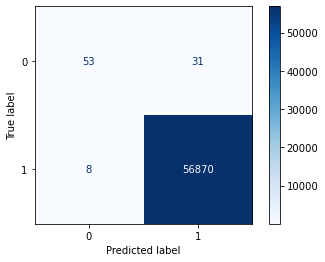

In [17]:
#yhat=logreg_cv.predict(X_test)
cm = confusion_matrix(y_test, yhat, labels=[1,0])
print('Confusion matrix:''\n', cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In this confusion matrix, the first row presents the negetive and second row presents the positive result. So we have a total of 56870 true positive and 8 false positive result. That explains, out of 56870+8= 56878, we have 56870 successfully classified normal transaction and 8 were falsely classified as normal but they were fraudlent.

#### Checking F1 Score

In [18]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.87      0.63      0.73        84

    accuracy                           1.00     56962
   macro avg       0.93      0.82      0.87     56962
weighted avg       1.00      1.00      1.00     56962



Based on the count of each section, we can calculate precision and recall of each label:

*   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

*   **Recall** is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate the precision and recall of each class.

**F1 score:**
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 1.0 in our case.

### Decision Trees with Scikit-learn

We will first create an instance of the **DecisionTreeClassifier** called **fraudTree**.
    Inside of the classifier, specify  *criterion="entropy"* so we can see the information gain of each node.

In [19]:
fraudTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
fraudTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>

In [20]:
fraudTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.

In [21]:
predTree = fraudTree.predict(X_test)

You can print out <b>predTree</b> and <b>y_test</b> if you want to visually compare the predictions to the actual values.

In [22]:
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 0 0]
[0 0 0 0 0]


#### Accuracy Evaluation by Jaccard Index

We can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [23]:
DT_AS = round(jaccard_score(y_test, predTree,pos_label=0)*100,2)

DT_AS

99.95

#### Accuracy Evaluation by Confusion Matrix

Another way of looking at the accuracy of the classifier is to look at **confusion matrix**.

Confusion matrix:
 [[   66    18]
 [   11 56867]]


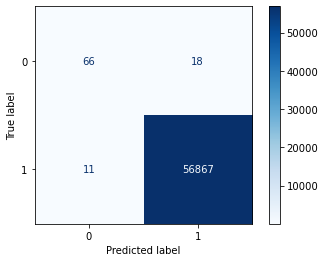

In [24]:
cm = confusion_matrix(y_test, predTree, labels=[1,0])
print('Confusion matrix:''\n', cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In this confusion matrix, the first row presents the negetive and second row presents the positive result. So we have a total of 56867 true positive and 11 false positive result. That explains, out of 56867+11= 56878, we have 56867 successfully classified normal transaction and 11 were falsely classified as normal but they were fraudlent.

#### Checking F1 Score

In [25]:
print (classification_report(y_test, predTree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.86      0.79      0.82        84

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



Based on the count of each section, we can calculate precision and recall of each label:

*   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

*   **Recall** is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate the precision and recall of each class.

**F1 score:**
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 1.0 in our case.

### K-Nearest-neighbours with Scikit-learn

Let's start the training algorithm with k=4 for now:

In [26]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

We can use the model to make predictions on the test set:

In [27]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

#### Accuracy Evaluation by Jaccard Index

We can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [28]:
KNN_AS = round(jaccard_score(y_test, yhat,pos_label=0)*100,2)

KNN_AS

99.96

#### Accuracy Evaluation by Confusion Matrix

Another way of looking at the accuracy of the classifier is to look at **confusion matrix**.

Confusion matrix:
 [[   67    17]
 [    3 56875]]


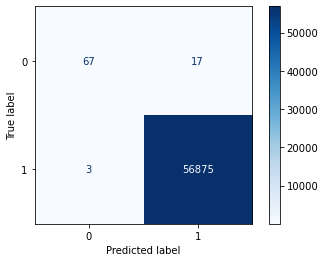

In [29]:
cm = confusion_matrix(y_test, yhat, labels=[1,0])
print('Confusion matrix:''\n', cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In this confusion matrix, the first row presents the negetive and second row presents the positive result. So we have a total of 56875 true positive and 3 false positive result. That explains, out of 56875+3= 56878, we have 56875 successfully classified normal transaction and 3 were falsely classified as normal but they were fraudlent.

#### Checking F1 Score

In [30]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.96      0.80      0.87        84

    accuracy                           1.00     56962
   macro avg       0.98      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



Based on the count of each section, we can calculate precision and recall of each label:

*   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

*   **Recall** is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate the precision and recall of each class.

**F1 score:**
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 1.0 in our case.

### Support Vector Machine with Scikit-learn

Let's start with Radial Basis Function (RBF) kernel.

In [31]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

After being fitted, the model can then be used to predict new values:

In [32]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

#### Accuracy Evaluation by Jaccard Index

We can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [33]:
SVM_AS = round(jaccard_score(y_test, yhat,pos_label=0)*100,2)

SVM_AS

99.96

#### Accuracy Evaluation by Confusion Matrix

Another way of looking at the accuracy of the classifier is to look at **confusion matrix**.

Confusion matrix:
 [[   64    20]
 [    4 56874]]


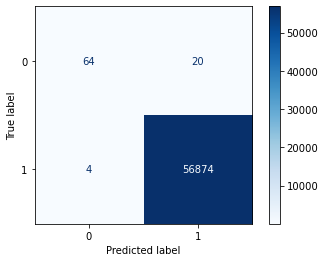

In [34]:
cm = confusion_matrix(y_test, yhat, labels=[1,0])
print('Confusion matrix:''\n', cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In this confusion matrix, the first row presents the negetive and second row presents the positive result. So we have a total of 56874 true positive and 4 false positive result. That explains, out of 56874+4= 56878, we have 56874 successfully classified normal transaction and 4 were falsely classified as normal but they were fraudlent.

#### Checking F1 Score

In [35]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.94      0.76      0.84        84

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Based on the count of each section, we can calculate precision and recall of each label:

*   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

*   **Recall** is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate the precision and recall of each class.

**F1 score:**
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 1.0 in our case.

### Random Forest with Scikit-learn

Initialize the Random Forest

In [36]:
RF = RandomForestClassifier()

#Train the model using Training Dataset
RF.fit(X_train, y_train)

RandomForestClassifier()

After being fitted, the model can then be used to predict new values:

In [37]:
yhat = RF.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

#### Accuracy Evaluation by Jaccard Index

We can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [38]:
RF_AS = round(jaccard_score(y_test, yhat,pos_label=0)*100,2)
RF_AS


99.96

#### Accuracy Evaluation by Confusion Matrix

Another way of looking at the accuracy of the classifier is to look at **confusion matrix**.

Confusion matrix:
 [[   69    15]
 [    5 56873]]


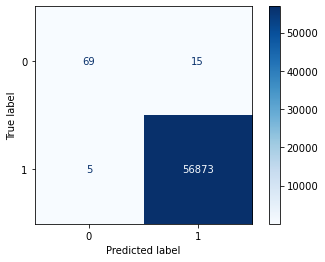

In [39]:
cm = confusion_matrix(y_test, yhat, labels=[1,0])
print('Confusion matrix:''\n', cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In this confusion matrix, the first row presents the negetive and second row presents the positive result. So we have a total of 56873 true positive and 5 false positive result. That explains, out of 56873+5= 56878, we have 56873 successfully classified normal transaction and 5 were falsely classified as normal but they were fraudlent.

#### Checking F1 Score

In [40]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.93      0.82      0.87        84

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



Based on the count of each section, we can calculate precision and recall of each label:

*   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

*   **Recall** is the true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate the precision and recall of each class.

**F1 score:**
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

Finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 1.0 in our case.

## Best Performed Method

In [41]:
BPM = pd.DataFrame({
    'Models': ['Logistic Regression', 'Decision Trees','K-Nearest-neighbours (KNN)', 
               'Support Vector Machine (SVM)', 'Random Forest'],
    'Accuracy_Score': [LR_AS, DT_AS, KNN_AS, SVM_AS, RF_AS]})

BPM.sort_values(by='Accuracy_Score', ascending=False)

,Models,Accuracy_Score
2,K-Nearest-neighbours (KNN),99.96
3,Support Vector Machine (SVM),99.96
4,Random Forest,99.96
1,Decision Trees,99.95
0,Logistic Regression,99.93


## Conclusion

*   We found **0.17%** Fraud Transaction were occured.
*   We found **99.96%** accuracy score for **Random Forest**. 
 

# Thank you very much for reading this NoteBook. Please share your comments and suggestions for improving more.